<a href="https://colab.research.google.com/github/AashiDutt/Pytorch/blob/master/Linear_Regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This repository contains code for Lnear regression using pytorch

In [2]:
 !pip3 install torch

In [0]:
import torch

### 1. create a dataset that will follow a linear pattern.

### 2.then draw a line that will incorrectly fit our      dataset.

### 3. use gradient descent to optimize/ minimize the error function and continue to do so until our  model is trained to fit our data well.

In [0]:
# initializing variables

w = torch.tensor(3.0,requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)



In [0]:
def forward(x):    # function to compute line y
  y = w*x + b   # output = weights*inputs + biases

# w = slope  b = intercept
# we use datapoints to optimize values of weights and biases
  return y

In [6]:
# defining x

x = torch.tensor([[4],[7]])
forward(x)

tensor([[13],
        [22]], grad_fn=<AddBackward0>)

In [0]:
# initializing a linear class

from torch.nn import Linear

In [8]:
torch.manual_seed(1) # sets a seed for generating random numbers

# creating a linear model

In [9]:
model = Linear(in_features = 1, out_features =1)  # for each output there is a single input

# printing parameters of linear model
print(model.bias,model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [0]:
 x = torch.tensor([[2.0],[3.3]])
 

In [11]:
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [0]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

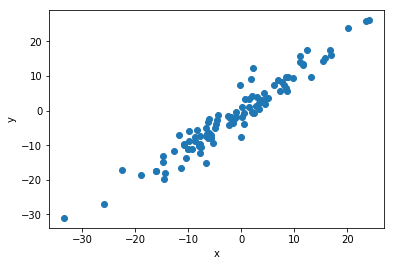

In [13]:
# creating dataset 
# randn(no. of rows, no. od column)returns a tensor filled with random numbers which are normally distributed

x = torch.randn(100,1)*10
y = x + 3*(torch.randn(100,1))  # adding noise and multiplying 3 to space out the points
plt.plot(x.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')

# creating a linear regression class


In [0]:

# Module is the base class for all neural n/w modules
#class LR will inherint methods and variables from this subclass
# use "super()" for inheritance

class LR(nn.Module):
  def __init__(self , input_size, output_size):  # constructor
    super().__init__()
    self.linear = nn.Linear(input_size,output_size) # instance of class LR
    
# make use of forward method for PREDICTIONS   
  def forward(self,x):
    pred = self.linear(x)
    return pred
   
    


In [15]:
torch.manual_seed(1)  # used to seek consistant results
model = LR(1,1)  # LR(input_size,output_size)
print(model)
#print(list(model.parameters()))

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
#x = torch.tensor(([1.0],[2.0]))
#print(model.forward(x))

In [0]:
[w ,b] = model.parameters()

#print(w,b)
#w1 =w[0][0].item()  # weight is a 2D tensor w[row][column]
#b1 = b[0].item()    # bias is a 1D tensor
#print(w1,b1)

def get_params():
  return (w[0][0].item(),b[0].item())   # return two values as a tuple

### Plotting best Fit Line to our dataset

In [0]:
def plot_fit():
  #plt.title =title
  w1 ,b1 = get_params()
  x1 = np.array([-30,30])  # always an array for compatibility with pyplot
  y1 = x1*w1 +b1   # returns 2 y1 points at -30 and 30
  
  plt.plot(x1,y1,'r')
  plt.scatter(x,y)
  plt.show()

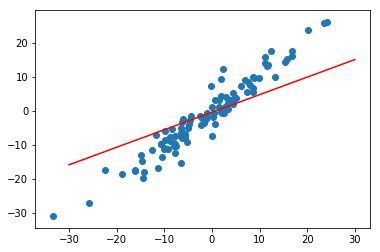

In [19]:
plot_fit()

### UNDERSTADING LOSS FUNCTION

### loss = actual - predicted value
 
 loss =  ( y - y^ )^2
 
 loss = ( y - ( w * x + b ))^2
 
 if b = 0 
 loss = ( y - w * x )^2
 
there exist optimal weight value that will yields minimun loss value

let actual coordinates = (-3,3)
loss = 3 -w(-3)

optimal value of w = -1
loss = 3+(-3) = 0

## GRADIENT DESCENT

how to train a model to predict the most optimal value for the weights eg w = -1

In [0]:
# Loss function
criterion = nn.MSELoss()

# optimizer - stochastic gradient descent
#updates the parameters much faster than batch gradient descent

optimizer = torch.optim.SGD(model.parameters(),lr =0.001)




In [34]:
#One Epoch is when an ENTIRE dataset is passed forward and backward
#through the neural network only ONCE

# optimizer is set to zero_grad because every time a variable is 
#back propogated through, the gradient will be accumulated instead of
#being replaced.because each module will be back propogated through several times.)

#optimizer.step() is performs a parameter update based on the current gradient
#(stored in .grad attribute of a parameter)

epochs = 100
losses=[]
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred,y)
  print("epoch:",i,"loss:",loss.item())
  losses.append(loss)
  
  optimizer.zero_grad()  
  
  loss.backward()    # take derivative of loss function
  optimizer.step()

epoch: 0 loss: 36695166976.0
epoch: 1 loss: 22747955200.0
epoch: 2 loss: 14101842944.0
epoch: 3 loss: 8741970944.0
epoch: 4 loss: 5419295232.0
epoch: 5 loss: 3359512832.0
epoch: 6 loss: 2082618752.0
epoch: 7 loss: 1291050624.0
epoch: 8 loss: 800344192.0
epoch: 9 loss: 496146880.0
epoch: 10 loss: 307569856.0
epoch: 11 loss: 190667792.0
epoch: 12 loss: 118198184.0
epoch: 13 loss: 73273064.0
epoch: 14 loss: 45423216.0
epoch: 15 loss: 28158624.0
epoch: 16 loss: 17456010.0
epoch: 17 loss: 10821280.0
epoch: 18 loss: 6708297.0
epoch: 19 loss: 4158590.5
epoch: 20 loss: 2577983.5
epoch: 21 loss: 1598138.75
epoch: 22 loss: 990716.375
epoch: 23 loss: 614165.0
epoch: 24 loss: 380734.5
epoch: 25 loss: 236026.953125
epoch: 26 loss: 146320.28125
epoch: 27 loss: 90709.59375
epoch: 28 loss: 56235.59765625
epoch: 29 loss: 34864.58203125
epoch: 30 loss: 21616.333984375
epoch: 31 loss: 13403.5185546875
epoch: 32 loss: 8312.2587890625
epoch: 33 loss: 5156.0986328125
epoch: 34 loss: 3199.541259765625
epoch:

Text(0.5, 0, 'epoch')

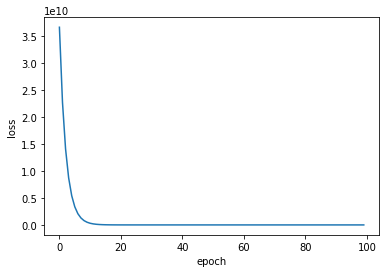

In [35]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')

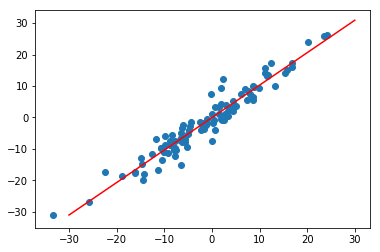

In [36]:
plot_fit()